# R이해하기
> ## 9. 통계 이해하기

In [315]:
# https://www.kaggle.com/rockbottom73/crude-oil-prices/downloads/crude-oil-prices.zip/1

library(readxl)
# read_excel() : default로 첫번째 시트 자료 읽어드림
raw <- read_excel('DATA/Crude Oil Prices Daily.xlsx')
head(raw)
tail(raw)

Date,Closing Value
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87
1986-01-09,26.03


Date,Closing Value
2018-07-02,73.89
2018-07-03,74.19
2018-07-04,NA
2018-07-05,73.05
2018-07-06,73.78
2018-07-09,73.93


In [318]:
# 단일 시계열 데이터 시각화, 종가가 최대였을대의 시점
cv_max <- raw$Date[which(raw$`Closing Value`== max(raw$`Closing Value`, na.rm = TRUE))]
cv_max

[1] "2008-07-03 UTC"

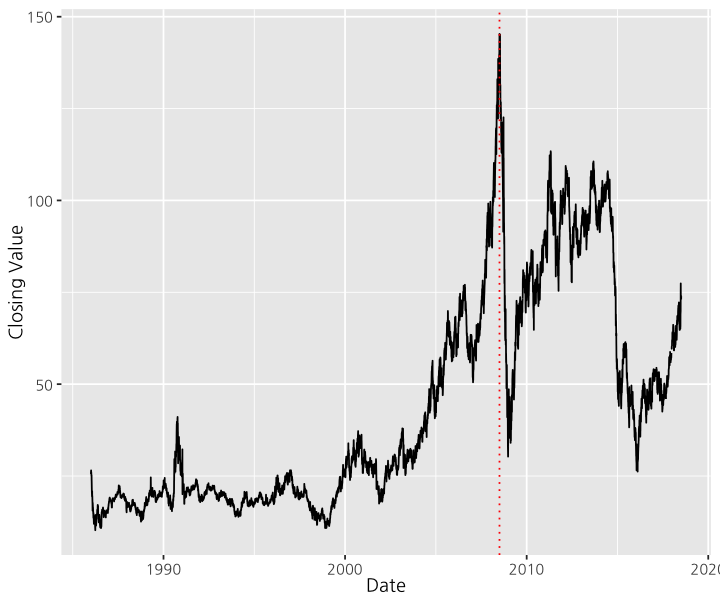

In [312]:
ggplot(raw, aes(x = Date, y = `Closing Value`)) +
geom_line() +
geom_vline(xintercept = as.numeric(cv_max),
          linetype = 3, colour = "red") 

In [322]:
df <- data.frame(Date = raw$Date, 
           year = as.numeric(format(raw$Date, format = "%Y")), 
           month = as.numeric(format(raw$Date, format = "%m")),
           day = as.numeric(format(raw$Date, format = "%d")),
           closing_value = raw$`Closing Value`
                )
head(df)
str(df)

Date,year,month,day,closing_value
1986-01-02,1986,1,2,25.56
1986-01-03,1986,1,3,26.00
1986-01-06,1986,1,6,26.53
1986-01-07,1986,1,7,25.85
1986-01-08,1986,1,8,25.87
1986-01-09,1986,1,9,26.03


'data.frame':	8223 obs. of  5 variables:
 $ Date         : POSIXct, format: "1986-01-02" "1986-01-03" ...
 $ year         : num  1986 1986 1986 1986 1986 ...
 $ month        : num  1 1 1 1 1 1 1 1 1 1 ...
 $ day          : num  2 3 6 7 8 9 10 13 14 15 ...
 $ closing_value: num  25.6 26 26.5 25.9 25.9 ...


In [323]:
# 수치 데이터를 변환 날짜로
df$year <- as.factor(df$year)
df$month <- as.factor(df$month)
str(df)

'data.frame':	8223 obs. of  5 variables:
 $ Date         : POSIXct, format: "1986-01-02" "1986-01-03" ...
 $ year         : Factor w/ 33 levels "1986","1987",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ month        : Factor w/ 12 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ day          : num  2 3 6 7 8 9 10 13 14 15 ...
 $ closing_value: num  25.6 26 26.5 25.9 25.9 ...


In [324]:
# 경고 문구 무시 옵션
options(warn = -1)

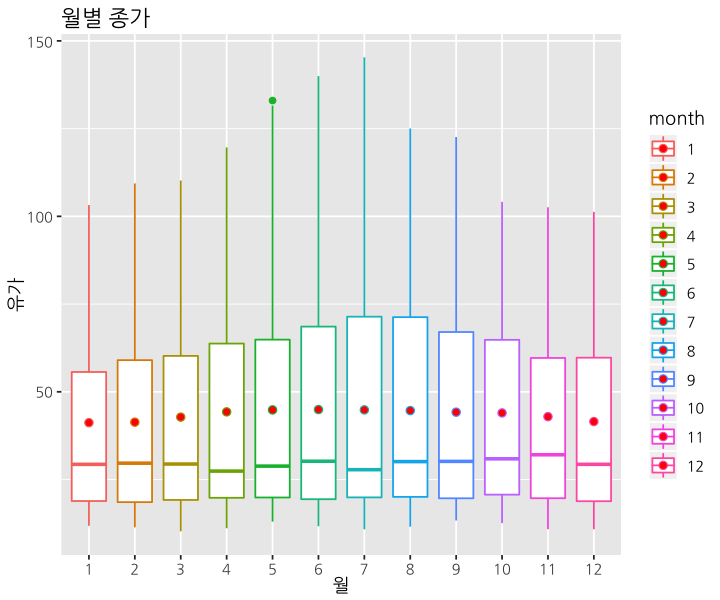

In [325]:
# 월별 데이터 상자그림
ggplot(df, aes(x = month, y = closing_value, group = month, col = month)) +
geom_boxplot() +
stat_summary(fun.y = "mean", geom= "point", shape = 21, size = 2, fill = "red") +
labs(title = "월별 종가", x = "월", y = "유가")  +
theme(text = element_text(family = "NanumGothic"))

## 8. 데이터 전처리

In [67]:
# 결측치 데이터 (missing data) 생성

x <- c(1, 2, NA, 5, 2, NA, 3)
x

[1]  1  2 NA  5  2 NA  3

In [68]:
# is.na함수로 na유무를 논리값으로 확인
is.na(x)

[1] FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE

In [69]:
# 결측치가 있는 경우 연산
mean(x)

[1] NA

In [70]:
# 결측치 계산을 위한 매개변수 설정 활용
mean(x, na.rm = TRUE)

[1] 2.6

In [71]:
# 기본 합, 표준편차, 분산함수의 경우 na제외하고 계산 가능
sum(x, na.rm = T)
sd(x, na.rm = T)
var(x, na.rm = T)

[1] 13

[1] 1.516575

[1] 2.3

In [72]:
# NULL값이 들어간 벡터 변수 생성
y <- c(1, NULL, 3)
y

[1] 1 3

In [73]:
# is.null함수의 경우 개별 값으로 묻지 않고 벡터 전체
# NULL이외의 값이 들어있는 경우 NULL이 포함되더라도 FALSE
is.null(y)

[1] FALSE

In [75]:
# 파이프 오퍼레이터 활용, dplyr에서도 활용
library(magrittr)

# 벡터 생성
x <- 1:10

# 함수 내 직접 매개변수 표기
mean(x)

# 초기 input변수에 대한 확인이 쉬움
# 초기값은 가장 좌측에 입력되는것으로 인색
x %>% mean

[1] 5.5

[1] 5.5

In [113]:
# 결측값 갯수 확인
z <- c(1, 2, 3, NA, 5, 6, 7, NA, NA)
sum(is.na(z))

[1] 3

In [114]:
# 파이프연산자 활용시 장점 : 코드 시안성이 좋아짐
z %>% is.na %>% sum

[1] 3

In [115]:
# 평균값으로 대체하는 경우
z # 기존
z[is.na(z)] <- mean(z, na.rm = TRUE)
z # 대체

[1]  1  2  3 NA  5  6  7 NA NA

[1] 1 2 3 4 5 6 7 4 4

In [116]:
z_normal <- (z - mean(z)) /sd(z)
z_normal

[1] -1.6035675 -1.0690450 -0.5345225  0.0000000  0.5345225  1.0690450  1.6035675
[8]  0.0000000  0.0000000

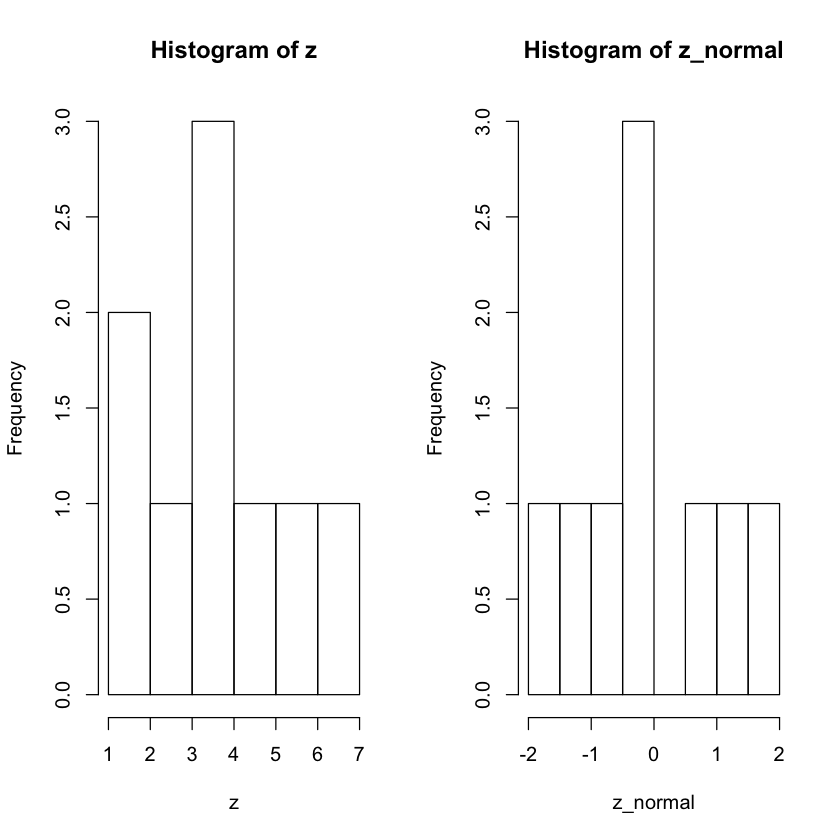

In [117]:
par(mfrow = c(1, 2))

hist(z)
hist(z_normal)

In [225]:
# 문자열 데이터(Manipulating strings)
# 범주형 데이터의 경우 특정 이름이나 명칭이 
# 다를 수 있기 때문에 데이터 변환 과정에서 필요

paste("담당자", "마이크", sep = "_")

[1] "SK_이노베이션"

In [1]:
x <- c("김팀장", "박팀장", "정팀장",
       "김팀장", "이팀장", "강팀장")

y <- c("S사_김팀장", "S사_박팀장", "S사_정팀장",
       "S사_김팀장", "S사_이팀장", "S사_강팀장")

In [2]:
# 회사 이름 명이  데이터에서 다르게 인식되는 경우
x == y

[1] FALSE FALSE FALSE FALSE FALSE FALSE

In [4]:
# rep함수 활용 문자열 6번 반복
rep("S사_", 6)

[1] "S사_" "S사_" "S사_" "S사_" "S사_" "S사_"

In [6]:
# paste함수를 활용하여 벡터를 결합
ed_list <- paste(rep("S사", 6), x, sep = "_")
ed_list

[1] "S사_김팀장" "S사_박팀장" "S사_정팀장" "S사_김팀장" "S사_이팀장"
[6] "S사_강팀장"

In [7]:
ed_list == y

[1] TRUE TRUE TRUE TRUE TRUE TRUE

In [8]:
# identical 함수를 활용하여 완전히 동일한지 확인
identical(ed_list, y)

[1] TRUE

In [9]:
sprintf("안녕하세요. %s, 반갑습니다.", ed_list)

[1] "안녕하세요. S사_김팀장, 반갑습니다." "안녕하세요. S사_박팀장, 반갑습니다."
[3] "안녕하세요. S사_정팀장, 반갑습니다." "안녕하세요. S사_김팀장, 반갑습니다."
[5] "안녕하세요. S사_이팀장, 반갑습니다." "안녕하세요. S사_강팀장, 반갑습니다."

In [15]:
sprintf("주요업정 분류로 %s, %s입니까?.",
        c("가스 혼합", "생산/판매", "화학제품",
          "용매 혼합", "품질관리", "인적자원관리" )
          , ed_list)

[1] "주요업정 분류로 가스 혼합, S사_김팀장입니까?."   
[2] "주요업정 분류로 생산/판매, S사_박팀장입니까?."   
[3] "주요업정 분류로 화학제품, S사_정팀장입니까?."    
[4] "주요업정 분류로 용매 혼합, S사_김팀장입니까?."   
[5] "주요업정 분류로 품질관리, S사_이팀장입니까?."    
[6] "주요업정 분류로 인적자원관리, S사_강팀장입니까?."

## 9 통계 이해하기

In [16]:
# 확률 분포(Probabilty Distribution)
# 표준정규분포함수 (rnorm) : 정규분포내 임의 값 생성
# 확률밀도함수(dnorm) 
# 누적분포 함수(pnorm) : 정규분포의 누적값(면적)
# 분위수함수(qnorm) : 확률을 입력하면 해당 변수 값을 찾아줌

# 표준정규분포(Normal Distribution) 통해서 랜덤 생성
rnorm(n = 5)

# 평균(mean)과 표준편차(standard deviation) 값을 
# 주어진 상태에서 랜덤 추출개수(n)
rnorm(n = 5, mean = 100, sd = 20)

[1] -0.88172363  0.07034515 -1.32951973  0.05809882 -0.65435977

[1] 79.42950 75.03633 90.23722 84.69098 72.08575

In [235]:
# 밀도(density ; the probability of a prticular value)

rnorm(5)
dnorm(rnorm(5))

[1] -0.2091357 -0.3364863 -0.3113718 -0.4870275 -0.7060686

[1] 0.2881671 0.3766230 0.3927694 0.2401096 0.3983863

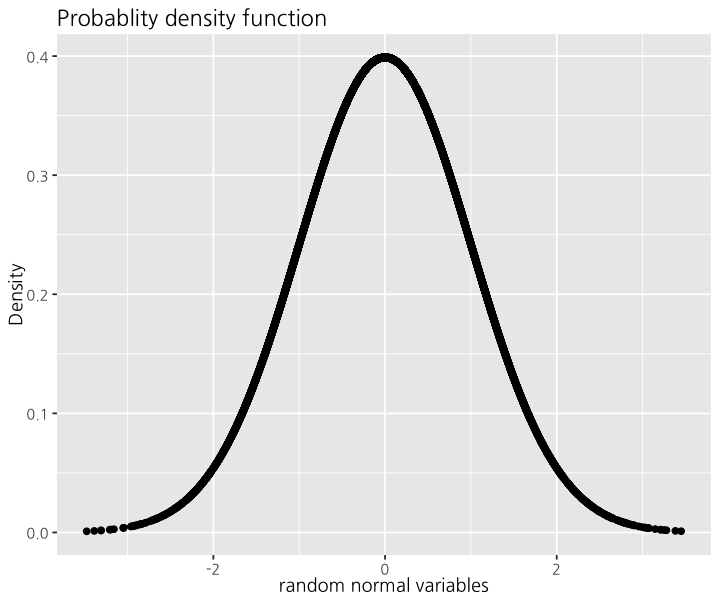

In [236]:
# 확률분포 시각화
library(ggplot2)

rno <- rnorm(10000)
dno <- dnorm(rno)
rand <- data.frame(x = rno, y = dno)

ggplot(rand, aes(x = x, y = y)) + geom_point() +
labs(title = "Probablity density function", x = "random normal variables",
    y = "Density")

In [237]:
# 데이터 생성
x_seq <- seq(from = -1, to = 1, by = .1)
y_seq <- dnorm(x_seq)
cover <- data.frame(x = x_seq, y = y_seq)
head(cover)

x,y
-1.0,0.2419707
-0.9,0.2660852
-0.8,0.2896916
-0.7,0.3122539
-0.6,0.3332246
-0.5,0.3520653


In [239]:
tot <- rbind(c(min(cover$x), 0),cover ,c(max(cover$x), 0))
head(tot)

x,y
-1.0,0.0000000
-1.0,0.2419707
-0.9,0.2660852
-0.8,0.2896916
-0.7,0.3122539
-0.6,0.3332246


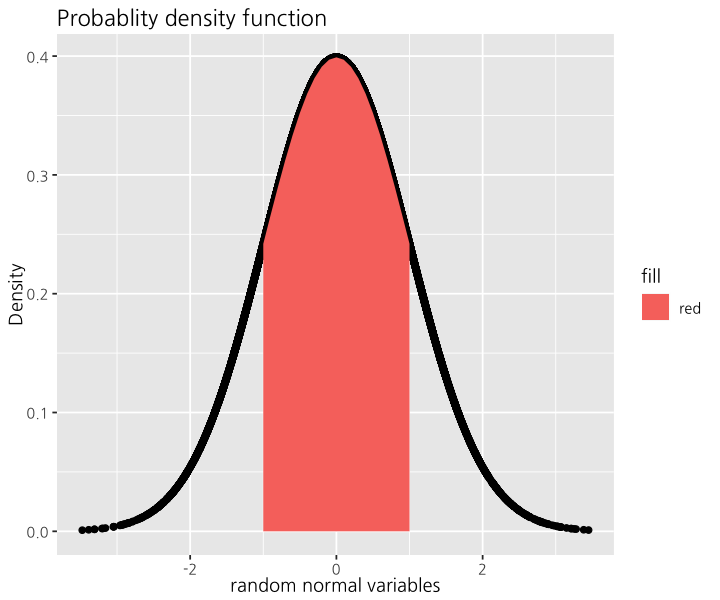

In [240]:
# ggplot을 활용해 확률밀도 함수 값에 대한 시각화

ggplot(rand, aes(x = x, y = y)) + 
geom_point() +
labs(title = "Probablity density function",
     x = "random normal variables",
     y = "Density") + 
geom_polygon(data = tot, aes( x= x, y = y, fill = "red"))

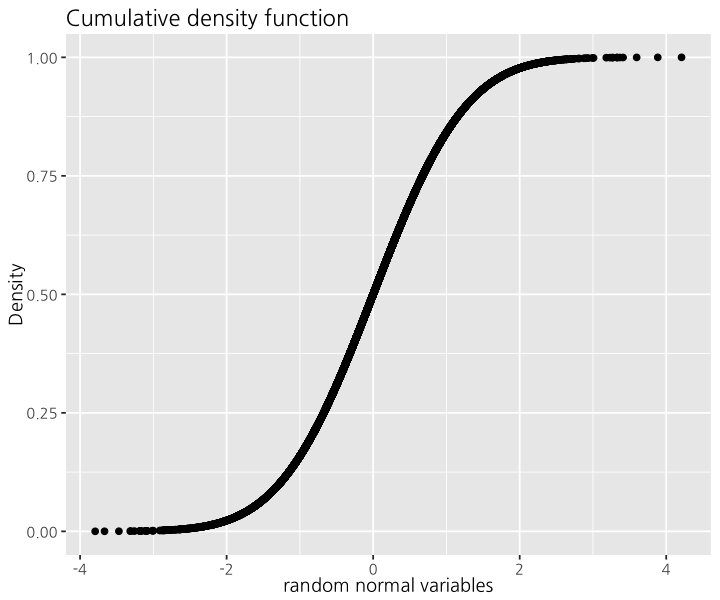

In [241]:
# 누적확률분포값 시각화

library(ggplot2)

rno <- rnorm(10000)
dno <- pnorm(rno)
rand <- data.frame(x = rno, y = dno)

ggplot(rand, aes(x = x, y = y)) + 
geom_point() +
labs(title = "Cumulative density function", 
     x = "random normal variables",
     y = "Density")

In [242]:
# 이항분포(binomial distribution)
# n번 독립적 시행에서 각 시행의 확률이 p를 갖는 경우의 확률분포
# p(x; n, p)

rbinom(n = 1, size = 10, prob = .4)

[1] 7

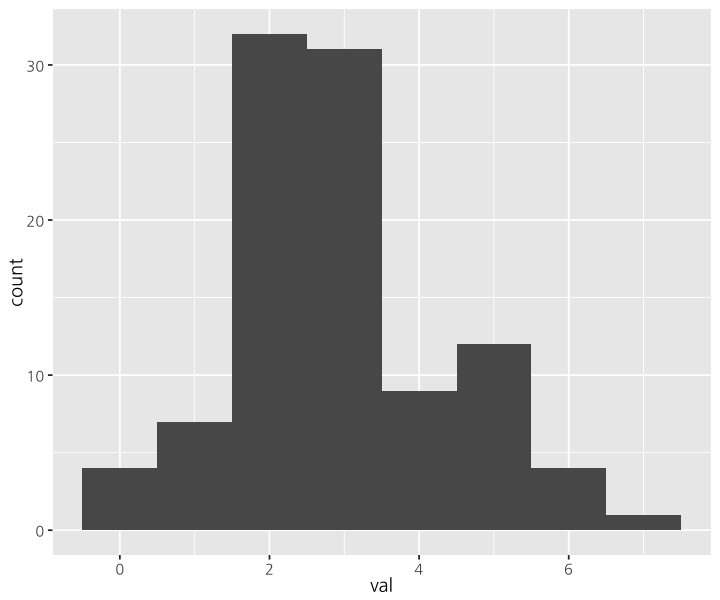

In [245]:
# 이항분포 시각화 예시
binom <- data.frame(val = rbinom(100, 10, .3))
ggplot(binom, aes( x = val)) + geom_histogram(binwidth = 1)

In [255]:
# 푸아송 분포 (Poisson Distribution)
# 이항 분포의 특수항 형태 
# n이 대단히 크고 , p가 작을때 푸아송 분포로 근사
# p(x; lambda)


pois1 <- rpois(n = 10000, lambda = 1)
pois2 <- rpois(n = 10000, lambda = 2)
pois5<- rpois(n = 10000, lambda = 5)
pois20 <- rpois(n = 10000, lambda = 20)


pois <- data.frame(l.1 = pois1, l.2 = pois2, l.5 = pois5, l.20 = pois20)
pois <- melt(pois)
colnames(pois) <- c("Lambda", "x")

No id variables; using all as measure variables


In [256]:
library(stringr)
 pois$Lambda <-str_extract(string = pois$Lambda, pattern = "\\d+")
head(pois)

Lambda,x
1,0
1,0
1,3
1,2
1,4
1,1


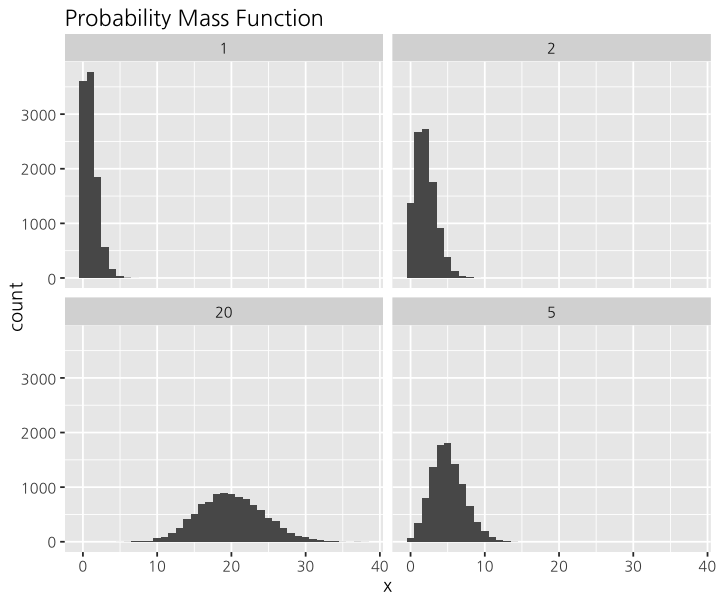

In [259]:
# 람다(lambda)에 따른 확률질량함수
ggplot(pois, aes(x = x)) + 
geom_histogram(binwidth = 1)  +
facet_wrap(~ Lambda) + ggtitle("Probability Mass Function")

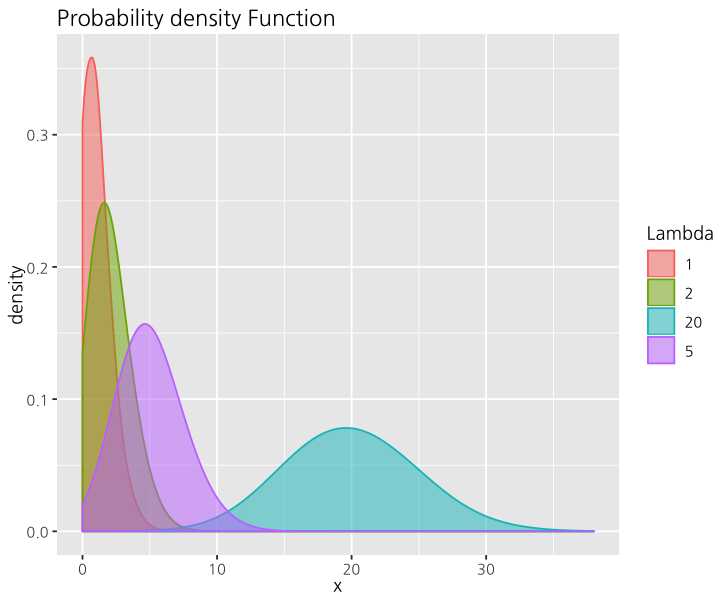

In [261]:
# 람다 변화값에 따른 확률밀도함수
ggplot(pois, aes(x = x)) + 
geom_density(aes(group = Lambda, color = Lambda, fill = Lambda),
            adjust = 4, alpha = .5) + 
scale_color_discrete() + scale_fill_discrete() +
ggtitle("Probability density Function")

### 참고) 다양한 분포
* http://www.math.wm.edu/~leemis/chart/UDR/UDR.html
* Normal
* Binomial
* Poisson
* t
* F
* Chie-Squared
* Gamma
* Geometric
* Negative Binomial
* Exponential
* Weibull
* Uniform
* Beta
* Cauchy
* Multinomial
* Hypergeometric
* Log-norma
* Logistic 

### 기술통계(descriptive Statistics, Basic Statistics)
* Summary Statistics
  * mean()
  * var()
  * cov()
  * corr()

In [189]:
x <- c(100, 85, 78, 90, 80)

# 평균
mean(x)

[1] 86.6

In [190]:
# 분산함수
var(x)

# 수식
sum((x - mean(x)) ^ 2)/ (length(x) -1)

[1] 77.8

[1] 77.8

In [191]:
# 표준편차
sqrt(var(x))
sd(x)

[1] 8.820431

[1] 8.820431

In [192]:
# 최소
min(x)

# 최대
max(x)

# 중앙값
median(x)

[1] 78

[1] 100

[1] 85

In [193]:
# 4분위함수
quantile(x)

0%  25%  50%  75% 100% 
  78   80   85   90  100

In [194]:
# 매개변수 probs에 대한 구간
quantile(x, probs = c(.26, .75))

26%  75% 
80.2 90.0

In [195]:
# summary함수를 활용하여 기초통계량 확인
summary(x)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   78.0    80.0    85.0    86.6    90.0   100.0 

In [197]:
# 상관관계(covariance, corrlation)

# ggplot2 예제 데이터 활용
library(ggplot2)
head(economics)

date,pce,pop,psavert,uempmed,unemploy
1967-07-01,506.7,198712,12.6,4.5,2944
1967-08-01,509.8,198911,12.6,4.7,2945
1967-09-01,515.6,199113,11.9,4.6,2958
1967-10-01,512.2,199311,12.9,4.9,3143
1967-11-01,517.4,199498,12.8,4.7,3066
1967-12-01,525.1,199657,11.8,4.8,3018


In [271]:
x1 <- economics$pce
x2 <- economics$ psavert

cor(x1, x2)

[1] -0.7928546

In [272]:
sum((x1 - mean(x1)) * (x2 - mean(x2)))  / 
(nrow(economics) * sd(x1) * sd(x2) )

[1] -0.7914733

In [273]:
# 공분산(covariance)
cov(x1, x2)

[1] -8359.069

In [201]:
sum((x1 - mean(x1)) * (x2 - mean(x2))) / (nrow(economics))

[1] -8344.506

In [202]:
cov(x1, x2) == cor(x1, x2) * sd(x1) * sd(x2)

[1] TRUE

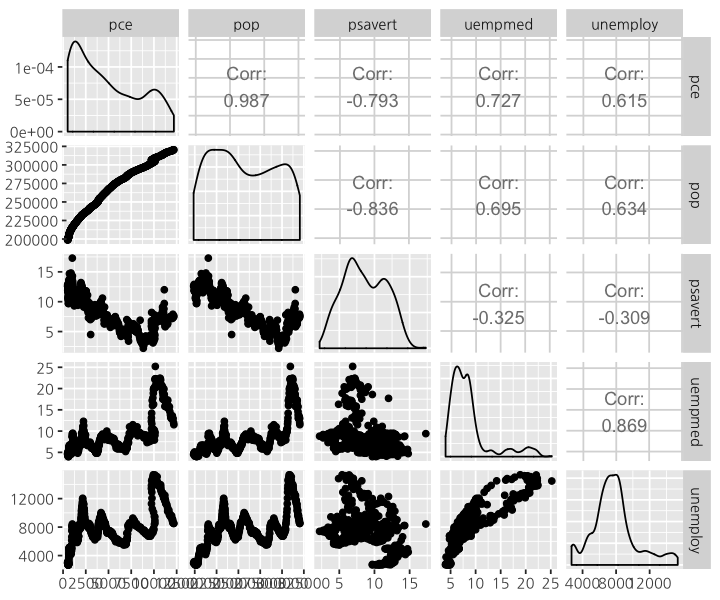

In [268]:
# 상관관계(correlation) 시각화
library(GGally)

ggpairs(economics[,-1])

In [274]:
data(tips, package = "reshape2")
head(tips)

total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.50,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4
25.29,4.71,Male,No,Sun,Dinner,4


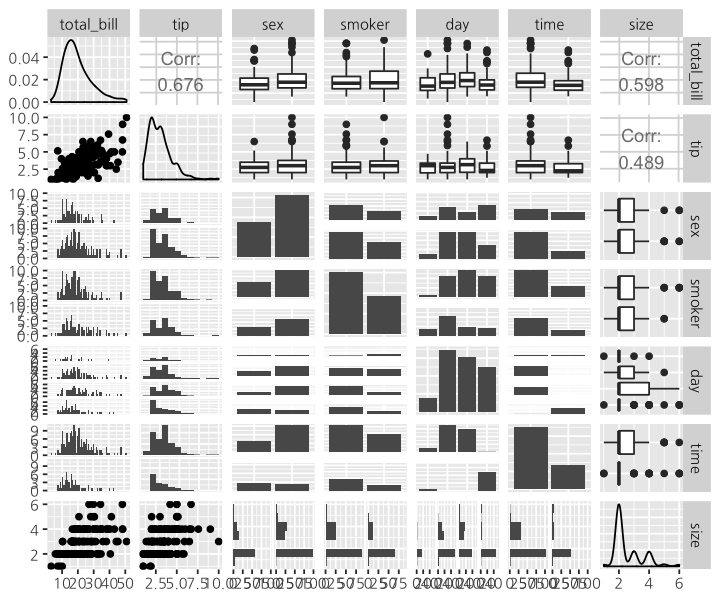

In [289]:
ggpairs(tips, lower=list(combo=wrap("facethist", binwidth=0.8)))